## Классификация текстов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1228)
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from nltk.stem.snowball import RussianStemmer
import seaborn as sns

Разбиение тектов на обучающее и тестовое множествоё

In [2]:
m = Mystem()
regex = re.compile('[А-яа-я]+')

def words_only(text, regex=regex):
    try:
        return ' '.join(regex.findall(text))
    except:
        return ''
    
def lemmatize(text, mystem=m):
    try:
        return ' '.join(m.lemmatize(text)).strip()
    except:
        return ''

def stemming(text, stemmer=RussianStemmer()):
    try:
        return ' '.join([stemmer.stem(w) for w in text.split()])
    except:
        return ''

In [3]:
data = pd.read_csv('datasets/nlp/lenta.csv', usecols=['text', 'class'])

data['class'].value_counts()

Россия               82
Экономика            62
Интернет и СМИ       54
Мир                  53
Спорт                52
Из жизни             46
Бывший СССР          38
Наука и техника      38
Силовые структуры    35
Культура             35
Ценности             24
Путешествия          19
Name: class, dtype: int64

In [4]:
data.head()

,text,class
0,Четырехкратный олимпийский чемпион и кандидат ...,Спорт
1,Трое курганских полицейских предстанут перед с...,Силовые структуры
2,"Дизайнер Николя Гескьер, креативный директор ж...",Ценности
3,Бойцы Вооруженных сил Украины во время испытан...,Бывший СССР
4,Басманный суд Москвы арестовал до 21 июля бывш...,Силовые структуры


In [5]:
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(words_only)
data['text'] = data['text'].apply(lemmatize)
# data['text'] = data['text'].apply(stemming)

In [6]:
stemming('потребитель')

'потребител'

In [7]:
corpus_sample_train = pd.DataFrame(columns=data.columns)
corpus_sample_test = pd.DataFrame(columns=data.columns)

for cl in data['class'].unique():
    corpus_sample = data[data['class'] == cl]
    if len(corpus_sample) > 30:
        corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:30, :])
        corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[30:, :])
    elif len(corpus_sample) > 50:
        corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:15, :])
        corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[15:, :])

In [8]:
# ?CountVectorizer
# ?TfidfVectorizer

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vect', CountVectorizer(analyzer='char', ngram_range={4, 6})),
    ('clf', RandomForestClassifier())
#     ('clf', MultinomialNB())
])

clf.fit(corpus_sample_train['text'], corpus_sample_train['class'])

Pipeline(steps=[('vect', CountVectorizer(analyzer='char', ngram_range={4, 6})),
                ('clf', RandomForestClassifier())])

In [14]:
true = corpus_sample_test['class']
predictions = clf.predict(corpus_sample_test['text'])

Precision:   0.54
Recall:   0.62
F1-mesure:   0.55
Accuracy:   0.56
                   precision    recall  f1-score   support

      Бывший СССР       0.33      0.75      0.46         8
         Из жизни       0.47      0.88      0.61        16
   Интернет и СМИ       0.43      0.38      0.40        24
         Культура       0.60      0.60      0.60         5
              Мир       0.36      0.35      0.36        23
  Наука и техника       0.58      0.88      0.70         8
           Россия       0.86      0.48      0.62        52
Силовые структуры       0.20      0.60      0.30         5
            Спорт       0.86      0.86      0.86        22
        Экономика       0.71      0.47      0.57        32

         accuracy                           0.56       195
        macro avg       0.54      0.62      0.55       195
     weighted avg       0.64      0.56      0.57       195



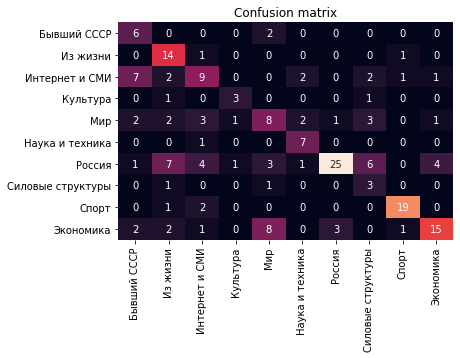

In [15]:
print(f"Precision: {precision_score(true, predictions, average='macro'):6.2f}")
print(f"Recall: {recall_score(true, predictions, average='macro'):6.2f}")
print(f"F1-mesure: {f1_score(true, predictions, average='macro'):6.2f}")
print(f"Accuracy: {accuracy_score(true, predictions):6.2f}")
print(classification_report(true, predictions))
labels = clf.classes_

sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt='d', cbar=False, xticklabels=labels, 
            yticklabels=labels)
plt.title('Confusion matrix')
plt.show()

In [16]:
# RandomForestClassifier
# Precision:   0.53
# Recall:   0.63
# F1-mesure:   0.53
# Accuracy:   0.55

#  MultinomialNB
# Precision:   0.57
# Recall:   0.64
# F1-mesure:   0.57
# Accuracy:   0.59

# WO stemming MultinomialNB
# Precision:   0.56
# Recall:   0.63
# F1-mesure:   0.56
# Accuracy:   0.59

# WO stemming RandomForestClassifier
# Precision:   0.54
# Recall:   0.62
# F1-mesure:   0.55
# Accuracy:   0.56